# Final Exam

## Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

We will use this dataset for several exercises:
- T test
- One way ANOVA
- Single variable linear regression
- Multiple Variable linear regresion


### Columns

* **id** - Unique ID for each home sold
* **date** - Date of the home sale
* **price** - Price of each home sold
* **bedrooms** - Number of bedrooms
* **bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* **sqft_living** - Square footage of the apartments interior living space
* **sqft_lot** - Square footage of the land space
* **floors** - Number of floors
* **waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not
* **view** - An index from 0 to 4 of how good the view of the property was
* **condition** - An index from 1 to 5 on the condition of the apartment,
* **grade** - An index from 1 to 13, describes quality level of construction and design. The higher the better
* **sqft_above** - The square footage of the interior housing space that is above ground level
* **sqft_basement** - The square footage of the interior housing space that is below ground level
* **yr_built** - The year the house was initially built
* **yr_renovated** - The year of the house’s last renovation
* **zipcode** - What zipcode area the house is in
* **lat** - Lattitude
* **long** - Longitude
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [20]:
import pandas as pd

In [21]:
house_df = pd.read_csv('./kc_house_data.csv')

---

## Pandas Basics

Print the first and the last 3 rows of the dataset

In [24]:
house_df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [25]:
house_df.tail(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


Print the column datatypes 

In [27]:
house_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Convert the `date` column into datatime 

In [30]:
house_df['date'] = pd.to_datetime(house_df['date'])

Which is the highest house price? 

In [38]:
house_df['price'].max()

7700000.0

Select the `[sqft_living, price, grade, zipcode]` of the houses with the `max` `grade`

In [37]:
max_grade = house_df['grade'].max()
desired_columns = ['sqft_living', 'price', 'grade', 'zipcode']
house_df[house_df['grade'] == max_grade][desired_columns]

,sqft_living,price,grade,zipcode
4411,9200,5570000.0,13,98039
4811,6810,2479000.0,13,98102
5451,4890,1780000.0,13,98059
6041,6330,2385000.0,13,98033
7035,7050,3800000.0,13,98004
7252,12050,7700000.0,13,98102
7907,7100,3200000.0,13,98199
9254,9890,6885000.0,13,98039
10373,7400,2983000.0,13,98006
13411,7880,2415000.0,13,98177


Print the earliest and latest registry dates

In [41]:
print(f"Latest registry: {house_df['date'].max()}" )
print(f"Earliest registry: {house_df['date'].min()}" )

Latest registry: 2015-05-27 00:00:00
Earliest registry: 2014-05-02 00:00:00


---


## Plotting

In [68]:
test_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'view']

From the test variables, select 3 of them and plot their frequency histogram

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'grade'}>],
       [<AxesSubplot:title={'center':'view'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

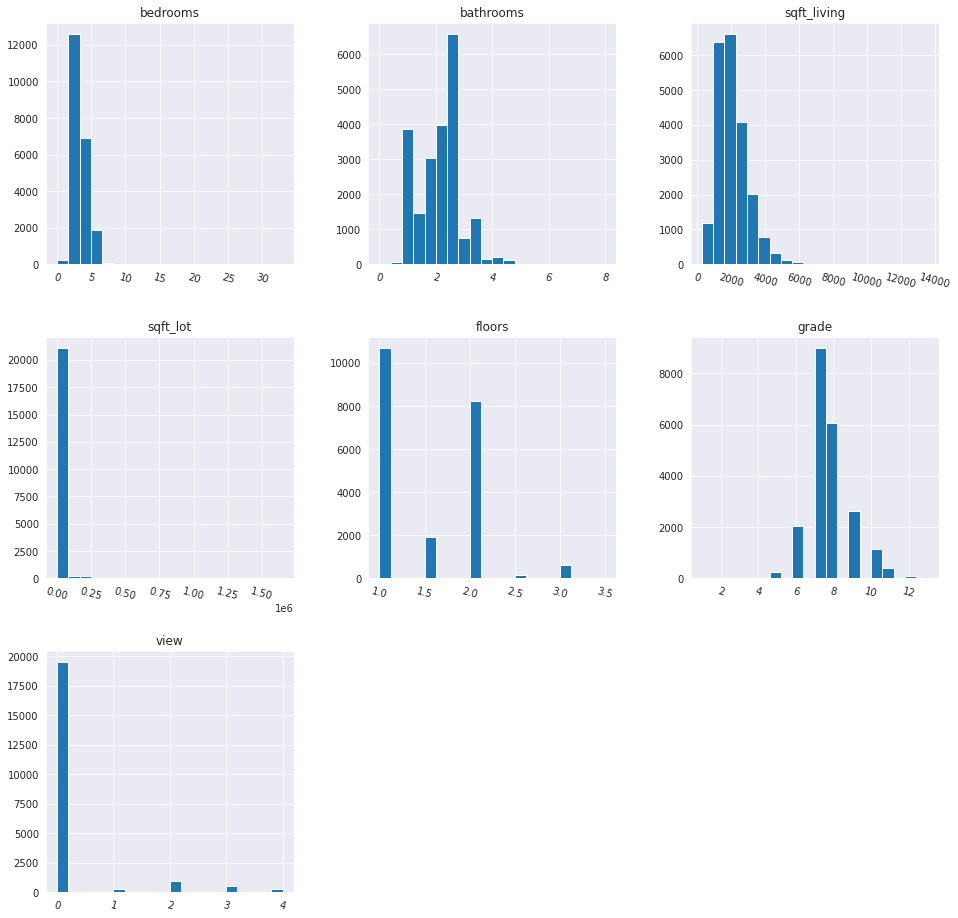

In [227]:
house_df[test_variables].hist(bins=20,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)

From the test variables, select 3  that you think has the highest correlation with the dependant variable `price`

Plot them using `lm_plot`

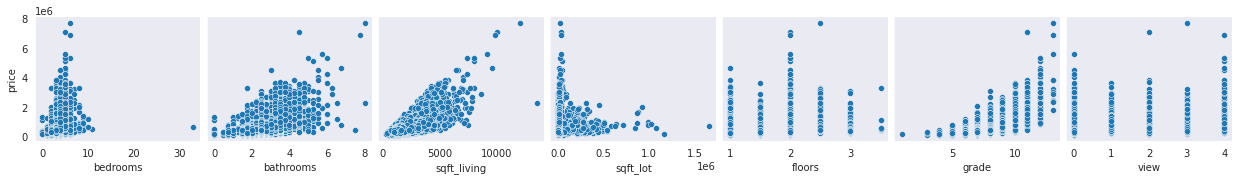

In [69]:
sns.pairplot(house_df,
             x_vars=test_variables,
             y_vars=['price'])

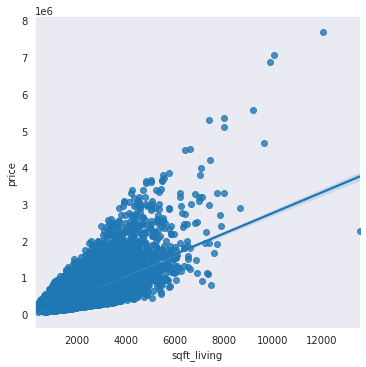

In [70]:
sns.lmplot(x='sqft_living', y='price', data=house_df)

---

## Statistics

### T test

#### One Sample t test

Find the t test and p-value for the `floors` of houses in `zipcode` **98039*** against all data

Interpret the results

In [146]:
floors_mean = house_df['floors'].mean()
zipcode_floors = house_df[house_df['zipcode'] == 98039 ]['floors']
stats.ttest_1samp(a=zipcode_floors, popmean=floors_mean) 

Ttest_1sampResult(statistic=0.9263683078526449, pvalue=0.3587949855959871)

#### Two sample t test

Calculate the `t` test and the `p-value` for the house `bathrooms` with **7** and **8** `bedrooms` 

Interpret the results

In [152]:
bedrooms_8 = house_df.query('bedrooms == 8')
bedrooms_7 = house_df.query('bedrooms == 7')

In [153]:
stats.ttest_ind(bedrooms_7['bathrooms'], bedrooms_8['bathrooms'])

Ttest_indResult(statistic=0.22343085955302625, pvalue=0.8241290825831792)

### One way ANOVA

Use one way ANOVA to compare the `floors` variance between houses with  5,6,7,8  `bedrooms`

Interpret results

In [157]:
bedrooms_6 = house_df.query('bedrooms == 6')
bedrooms_5 = house_df.query('bedrooms == 5')

In [158]:
stats.f_oneway(bedrooms_5['floors'], bedrooms_6['floors'], bedrooms_7['floors'], bedrooms_5['floors'])

F_onewayResult(statistic=1.2755902927534866, pvalue=0.28096504742780765)

---

## Linear Regression

Use `ols` for each column and print the `r-squared` and `p-value`

In [241]:
for column in house_df.columns:
    results = ols(f"price ~ {column}", data=house_df).fit()
    print(f'Column: {column}')
    print(f'    p-value: {results.f_pvalue}')
    print(f'    r squared: {results.rsquared}')
    print()

Column: price
    p-value: 0.0
    r squared: 1.0

Column: bedrooms
    p-value: 0.0
    r squared: 0.0950794746765764

Column: bathrooms
    p-value: 0.0
    r squared: 0.27576939959239877

Column: sqft_living
    p-value: 0.0
    r squared: 0.4928532179037931

Column: sqft_lot
    p-value: 7.972504510326147e-40
    r squared: 0.0080390699212195

Column: floors
    p-value: 1.6e-322
    r squared: 0.06594310068341103

Column: waterfront
    p-value: 0.0
    r squared: 0.07095267538578331

Column: view
    p-value: 0.0
    r squared: 0.15784211584121544

Column: condition
    p-value: 8.935654062331967e-08
    r squared: 0.0013221797086617748

Column: grade
    p-value: 0.0
    r squared: 0.44546848610928713

Column: sqft_above
    p-value: 0.0
    r squared: 0.36671175283827917

Column: sqft_basement
    p-value: 0.0
    r squared: 0.104856815269744

Column: yr_built
    p-value: 1.929872809374955e-15
    r squared: 0.002917245534413082

Column: yr_renovated
    p-value: 1.02134788580

Use statsmodels `ols` to find the r squared value for all variables. Interpret  the results

In [242]:
from statsmodels.formula.api import ols
# ols summary
# Remember you need to include only numerical data, and exclude id

In [243]:
formula = f"""price ~ 
                    bedrooms +
                    bathrooms +
                    sqft_living +
                    sqft_lot +
                    floors +
                    waterfront +
                    view +
                    condition +
                    grade +
                    sqft_above +
                    sqft_basement +
                    yr_built +
                    yr_renovated +
                    zipcode +
                    lat +
                    long +
                    sqft_living15 +
                    sqft_lot15"""
results = ols(formula, data=house_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Fri, 30 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:58:48   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       6.69e+06   2.93e+06      2.282      0.022    9.44e+05    1.24e+07
bedrooms      -3.577e+04   1891.843    -18.906      0.000   -3.95e+04   -3.21e+04
bathrooms      4.114e+04   3253.678     12.645      0.000    3.48e+04    4.75e+04
sqft_living     110.4400      2.270     48.661      0.000     105.991     114.889
sqft_lot          0.1286      0.048      2.683      0.007       0.035       0.223
floors         6689.5501   3595.859      1.860      0.063    -358.599    1.37e+04
waterfront      5.83e+05   1.74e+04     33.580      0.000    5.49e+05    6.17e+05
view           5.287e+04   2140.055     24.705      0.000    4.87e+04    5.71e+04
condition      2.639e+04   2351.461     11.221      0.000    2.18e+04     3.1e+04
grade          9.589e+04   2152.789     44.542      0.000    9.17e+04       1e+05
sqft_above       70.7881      2.253     31.415      0.000      66.371      75.205
sqft_basement    39.6605      2.647     14.985      0.000      34.473      44.848
yr_built      -2620.2232     72.659    -36.062      0.000   -2762.640   -2477.806
yr_renovated     19.8126      3.656      5.420      0.000      12.647      26.978
zipcode        -582.4199     32.986    -17.657      0.000    -647.074    -517.765
lat            6.027e+05   1.07e+04     56.149      0.000    5.82e+05    6.24e+05
long          -2.147e+05   1.31e+04    -16.349      0.000    -2.4e+05   -1.89e+05
sqft_living15    21.6814      3.448      6.289      0.000      14.924      28.439
sqft_lot15       -0.3826      0.073     -5.222      0.000      -0.526      -0.239
==============================================================================
Omnibus:                    18384.201   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1868224.491
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      47.985   Cond. No.                     3.35e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.95e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [244]:
print(f'{results.rsquared *100} % of the depentant variable, is explained by the data')

69.97471890109156 % of the depentant variable, is explained by the data


Print the coeficients and p values from each dependant variable

In [245]:
# coeficients
print('Coeficients')
print(results.params)

# p values
print('Pvalues')
print(results.pvalues)

Coeficients
Intercept        6.690325e+06
bedrooms        -3.576654e+04
bathrooms        4.114428e+04
sqft_living      1.104400e+02
sqft_lot         1.285979e-01
floors           6.689550e+03
waterfront       5.829605e+05
view             5.287094e+04
condition        2.638565e+04
grade            9.589045e+04
sqft_above       7.078810e+01
sqft_basement    3.966051e+01
yr_built        -2.620223e+03
yr_renovated     1.981258e+01
zipcode         -5.824199e+02
lat              6.027482e+05
long            -2.147298e+05
sqft_living15    2.168140e+01
sqft_lot15      -3.826418e-01
dtype: float64
Pvalues
Intercept         2.248541e-02
bedrooms          4.460096e-79
bathrooms         1.596998e-36
sqft_living       0.000000e+00
sqft_lot          7.291971e-03
floors            6.284986e-02
waterfront       5.007658e-241
view             6.538058e-133
condition         3.874277e-29
grade             0.000000e+00
sqft_above       7.236128e-212
sqft_basement     1.643782e-50
yr_built         1.3890

Which are the 3 variables with the highest coeficient? Do it by code

In [246]:
results.params.sort_values()[-4:-1]

grade          95890.445151
waterfront    582960.458423
lat           602748.226449
dtype: float64

### Sklearn LinearRegresion

Using LinearRegression train a model and get the accuracy score 

In [247]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
numeric_df = house_df._get_numeric_data()
x = numeric_df.drop(['price'], axis=1)
y = numeric_df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.698935541005893

---

## VIF Multicoliniarity 

Calculate the VIF for every value in the data. 

In [248]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
numeric_df = house_df._get_numeric_data().drop(['price'], axis=1)
vifs = pd.DataFrame()
vifs["feature"] = numeric_df.columns
vifs["VIF"] = [variance_inflation_factor(numeric_df.values, i)
                          for i in range(len(numeric_df.columns))]
vifs.sort_values(['VIF'])

/home/brian/miniconda3/envs/pypy/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
12,yr_renovated,1.195015e+00
5,waterfront,1.212827e+00
6,view,1.551834e+00
3,sqft_lot,2.377656e+00
17,sqft_lot15,2.598758e+00
4,floors,1.689222e+01
0,bedrooms,2.327239e+01
16,sqft_living15,2.710315e+01
1,bathrooms,2.861188e+01
7,condition,3.471167e+01


---

## Correlation Matrix

Calculate the correlation matrix

In [249]:
house_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


<AxesSubplot:title={'center':'Correlation of features'}>

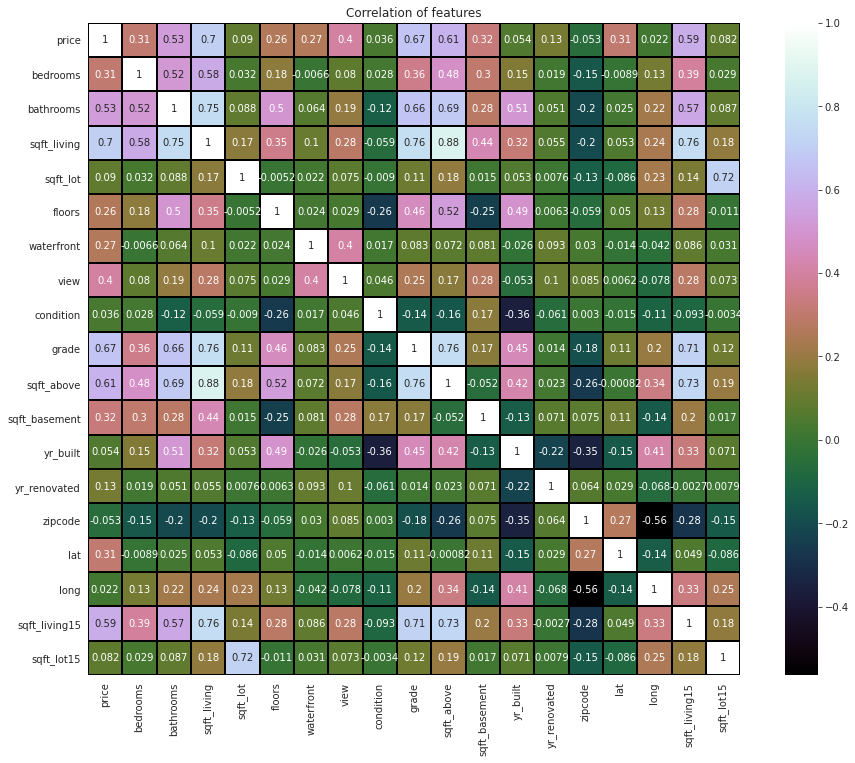

In [250]:
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Correlation of features')
sns.heatmap(house_df._get_numeric_data().corr(),
            linewidths=0.25,
            vmax=1.0, 
            square=True, 
            cmap="cubehelix", 
            linecolor='k', 
            annot=True)